To use BigQuery, we'll import the Python package below:

In [1]:
!pip install google.cloud.bigquery
!pip install os
!pip install pandas
!pip install pandas-gbq
!pip install matplotlib

  Using cached google_cloud_bigquery-3.4.2-py2.py3-none-any.whl (215 kB)
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
import os
import pandas_gbq
from google.cloud import bigquery
from google.cloud.bigquery.client import Client

The first step in the workflow is to create a Client object. As you'll soon see, this Client object will play a central role in retrieving information from BigQuery datasets.

In [3]:
credentials_path = '/home/elias/BigqueryClient.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credentials_path

client = bigquery.Client()

#### Below we can select some example datasets like:
- chicago_taxi_trips
- openaq
- world_bank_intl_education
- crypto_bitcoin
- github_repos
- stackoverflow

In [4]:
# Construct a reference to the dataset (Can change openaq to desired dataset )
dataset_ref = client.dataset("stackoverflow", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [5]:
# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)

badges
comments
post_history
post_links
posts_answers
posts_moderator_nomination
posts_orphaned_tag_wiki
posts_privilege_wiki
posts_questions
posts_tag_wiki
posts_tag_wiki_excerpt
posts_wiki_placeholder
stackoverflow_posts
tags
users
votes


If you are interested in people who answer questions on a given topic, the posts_answers table is a natural place to look. Run the following cell, and look at the output.

In [7]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("posts_answers")

# API request - fetch the table
table = client.get_table(table_ref)
table.schema

[SchemaField('id', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('title', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('body', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('accepted_answer_id', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('answer_count', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('comment_count', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('community_owned_date', 'TIMESTAMP', 'NULLABLE', None, None, (), None),
 SchemaField('creation_date', 'TIMESTAMP', 'NULLABLE', None, None, (), None),
 SchemaField('favorite_count', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('last_activity_date', 'TIMESTAMP', 'NULLABLE', None, None, (), None),
 SchemaField('last_edit_date', 'TIMESTAMP', 'NULLABLE', None, None, (), None),
 SchemaField('last_editor_display_name', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('last_editor_user_id', 'INTEGER', 'NULLABLE', None, None, (), None),
 Sc

<img src=https://i.imgur.com/biYqbUB.png>

##### We can use the list_rows() method to check just the first five lines of of the full table to make sure this is right.

##### This returns a BigQuery RowIterator object that can quickly be converted to a pandas DataFrame with the to_dataframe() method.

In [8]:
# Preview the first five lines of the table
df = client.list_rows(table, max_results=5).to_dataframe()
df.head()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,18,None,<p>For a table like this:</p>\n\n<pre><code>CR...,None,None,2,NaT,2008-08-01 05:12:44.193000+00:00,None,2016-06-02 05:56:26.060000+00:00,2016-06-02 05:56:26.060000+00:00,Jeff Atwood,126039,phpguy,<NA>,17,2,59,None,None
1,165,None,"<p>You can use a <a href=""http://sharpdevelop....",None,None,0,NaT,2008-08-01 18:04:25.023000+00:00,None,2019-04-06 14:03:51.080000+00:00,2019-04-06 14:03:51.080000+00:00,None,1721793,user2189331,<NA>,145,2,10,None,None
2,1028,None,<p>The VB code looks something like this:</p>\...,None,None,0,NaT,2008-08-04 04:58:40.300000+00:00,None,2013-02-07 13:22:14.680000+00:00,2013-02-07 13:22:14.680000+00:00,None,395659,user2189331,<NA>,947,2,8,None,None
3,1073,None,<p>My first choice would be a dedicated heap t...,None,None,0,NaT,2008-08-04 07:51:02.997000+00:00,None,2015-09-01 17:32:32.120000+00:00,2015-09-01 17:32:32.120000+00:00,None,45459,user2189331,<NA>,1069,2,29,None,None
4,1260,None,<p>I found the answer. all you have to do is a...,None,None,0,NaT,2008-08-04 14:06:02.863000+00:00,None,2016-12-20 08:38:48.867000+00:00,2016-12-20 08:38:48.867000+00:00,None,1221571,Jin,<NA>,1229,2,1,None,None


In [9]:
df.describe()

/home/elias/SQL/.venv/lib/python3.8/site-packages/pandas/core/array_algos/quantile.py:207: RuntimeWarning: invalid value encountered in cast
  and (result == result.astype(values.dtype, copy=False)).all()


,id,comment_count,last_editor_user_id,owner_user_id,parent_id,post_type_id,score
count,5.0,5.0,5.0,0.0,5.0,5.0,5.0
mean,708.8,0.4,702104.2,<NA>,681.4,2.0,21.4
std,572.554539,0.894427,735960.885354,<NA>,558.971198,0.0,23.43715
min,18.0,0.0,45459.0,<NA>,17.0,2.0,1.0
25%,165.0,0.0,126039.0,<NA>,145.0,2.0,8.0
50%,1028.0,0.0,395659.0,<NA>,947.0,2.0,10.0
75%,1073.0,0.0,1221571.0,<NA>,1069.0,2.0,29.0
max,1260.0,2.0,1721793.0,<NA>,1229.0,2.0,59.0


It isn't clear yet how to find users who answered questions on any given topic. But posts_answers has a parent_id column. If you are familiar with the Stack Overflow site, you might figure out that the parent_id is the question each post is answering.

Look at posts_questions using the cell below.


In [10]:
# Construct a reference to the "posts_questions" table
questions_table_ref = dataset_ref.table("posts_questions")

# API request - fetch the table
questions_table = client.get_table(questions_table_ref)

# Preview the first five lines of the "posts_questions" table
client.list_rows(questions_table, max_results=5).to_dataframe()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,320268,Html.ActionLink doesn’t render # properly,<p>When using Html.ActionLink passing a string...,<NA>,0,0,NaT,2008-11-26 10:42:37.477000+00:00,0,2009-02-06 20:13:54.370000+00:00,NaT,None,<NA>,Paulo,<NA>,None,1,0,asp.net-mvc,390
1,324003,Primitive recursion,<p>how will i define the function 'simplify' ...,<NA>,0,0,NaT,2008-11-27 15:12:37.497000+00:00,0,2012-09-25 19:54:40.597000+00:00,2012-09-25 19:54:40.597000+00:00,Marcin,1288,None,41000,None,1,0,haskell|lambda|functional-programming|lambda-c...,497
2,390605,While vs. Do While,<p>I've seen both the blocks of code in use se...,390608,0,0,NaT,2008-12-24 01:49:54.230000+00:00,2,2008-12-24 03:08:55.897000+00:00,NaT,None,<NA>,Unkwntech,115,None,1,0,language-agnostic|loops,11262
3,413246,Protect ASP.NET Source code,<p>Im currently doing some research in how to ...,<NA>,0,0,NaT,2009-01-05 14:23:51.040000+00:00,0,2009-03-24 21:30:22.370000+00:00,2009-01-05 14:42:28.257000+00:00,Tom Anderson,13502,Velnias,<NA>,None,1,0,asp.net|deployment|obfuscation,4823
4,454921,"Difference between ""int[] myArray"" and ""int my...",<blockquote>\n <p><strong>Possible Duplicate:...,454928,0,0,NaT,2009-01-18 10:22:52.177000+00:00,0,2009-01-18 10:30:50.930000+00:00,2017-05-23 11:49:26.567000+00:00,None,-1,Evan Fosmark,49701,None,1,0,java|arrays,798


posts_questions has a column called tags which lists the topics/technologies each question is about.

posts_answers has a column called parent_id which identifies the ID of the question each answer is responding to. posts_answers also has an owner_user_id column which specifies the ID of the user who answered the question.

You can join these two tables to:

determine the tags for each answer, and then
select the owner_user_id of the answers on the desired tag.

In [13]:
questions_query = """
                  SELECT id, title, owner_user_id
                  FROM `bigquery-public-data.stackoverflow.posts_questions`
                  WHERE tags LIKE '%bigquery%'
                  """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
questions_query_job = client.query(questions_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
questions_results = questions_query_job.to_dataframe()

# Preview results
questions_results.head()

,id,title,owner_user_id
0,73387570,Data loss after billing changed in bigquery,19784500
1,73474242,Sum of repeated numeric columns (array) in Big...,12018883
2,73521676,Is there any way we can pass avro schema file ...,19865820
3,73355665,Converting seconds to time duration in BigQuery,15200064
4,73377293,How to write data to bq using streaming with a...,19777578


## INNER JOIN
Query that returns the id, body and owner_user_id columns from the posts_answers table for answers to "bigquery"-related questions.

In [14]:
answers_query = """
                SELECT a.id, a.body, a.owner_user_id
                FROM `bigquery-public-data.stackoverflow.posts_questions` AS q 
                INNER JOIN `bigquery-public-data.stackoverflow.posts_answers` AS a
                    ON q.id = a.parent_id
                WHERE q.tags LIKE '%bigquery%'
                """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 27 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=27*10**10)
answers_query_job = client.query(answers_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
answers_results = answers_query_job.to_dataframe()

answers_results.head()

,id,body,owner_user_id
0,42112599,<p>Answering myself here. Another approach I'v...,7020329
1,42201257,<p>You can use C# to connect to a BigQuery dat...,356506
2,42213831,<p>You do not need to give the keys for the fi...,5520858
3,42267244,"<p>Well, I can't really speak to your GA data ...",845356
4,42326929,<p>Although any string that you put in a JSON ...,1039247


We have the merge we need. But you want a list of users who have answered many questions...

We will make a new query that has a single row for each user who answered at least one question with a tag that includes the string "bigquery". 

The results should have two columns:
- user_id - contains the owner_user_id column from the posts_answers table
- number_of_answers - contains the number of answers the user has written to "bigquery"-related questions

In [25]:
bigquery_experts_query = """
                         SELECT a.owner_user_id AS user_id, COUNT(1) AS number_of_answers
                         FROM `bigquery-public-data.stackoverflow.posts_questions` AS q
                         INNER JOIN `bigquery-public-data.stackoverflow.posts_answers` AS a
                             ON q.id = a.parent_Id
                         WHERE q.tags LIKE '%bigquery%'
                         GROUP BY a.owner_user_id
                         ORDER BY number_of_answers DESC
                         """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
bigquery_experts_query_job = client.query(bigquery_experts_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
bigquery_experts_results = bigquery_experts_query_job.to_dataframe()

bigquery_experts_results.head(10)

,user_id,number_of_answers
0,5221944,5203
1,1144035,1634
2,132438,898
3,6253347,737
4,1366527,620
5,243782,613
6,13473525,380
7,4490873,275
8,11206202,264
9,2877278,261


<AxesSubplot: xlabel='user_id', ylabel='number_of_answers'>

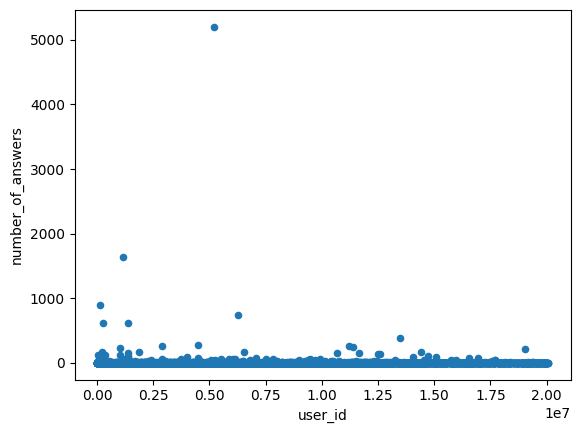

In [26]:
bigquery_experts_results.plot(x='user_id', y='number_of_answers', kind='scatter')